In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()

import PIL
import glob

In [2]:
X_input = []
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6"]
X_names = np.asarray(input_names)

Y_output = []

In [3]:
Sa1_files = glob.glob("sa1_16to20/*")

In [4]:
len(Sa1_files)

93

In [5]:
def block_avg_5x5(arrayImage):
    arrayImage = np.delete(arrayImage, (-1), axis=0)
    arrayImage = np.delete(arrayImage, (-1), axis=1)
    arrayImage = arrayImage.reshape(51, 5, 51, 5)
    arrayImage = arrayImage.mean(axis= (1, 3))
    
    return arrayImage;

In [6]:
for filename in Sa1_files:
    filename = filename.split('/')[1]
    
    # Satellite 1
    Sa_1_File = "sa1_256/" + filename;
    Sa1 = PIL.Image.open(Sa_1_File).convert("L")
    Sa1 = block_avg_5x5(Sa1)
    Sa1arr = np.array(Sa1).flatten()
    

    # Satellite 2
    Sa_2_File = "sa2_256/" + filename;
    Sa2 = PIL.Image.open(Sa_2_File).convert("L")
    Sa2 = block_avg_5x5(Sa2)
    Sa2arr = np.array(Sa2).flatten()
    
    
    # Satellite 3
    Sa_3_File = "sa3_256/" + filename;
    Sa3 = PIL.Image.open(Sa_3_File).convert("L")
    Sa3 = block_avg_5x5(Sa3)
    Sa3arr = np.array(Sa3).flatten()
    
    
    # Satellite 4
    Sa_4_File = "sa4_256/" + filename;
    Sa4 = PIL.Image.open(Sa_4_File).convert("L")
    Sa4 = block_avg_5x5(Sa4)
    Sa4arr = np.array(Sa4).flatten()
    
    
    # Satellite 6
    Sa_6_File = "sa6_256/" + filename;
    Sa6 = PIL.Image.open(Sa_6_File).convert("L")
    Sa6 = block_avg_5x5(Sa6)
    Sa6arr = np.array(Sa6).flatten()
    
    
    # Radar
    Radar_File = "radpng/" + filename.replace('sat', "rad", 1)
    Radar = PIL.Image.open(Radar_File).convert("L")
    Radar = block_avg_5x5(Radar)
    Radararr = np.array(Radar).flatten()
    
    

    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        Y_output.append(Radararr[i])
        
        X_input.append(x)

In [7]:
X_input = np.array(X_input)
Y_output = np.array(Y_output)

In [8]:
Y_output.shape

(241893,)

In [9]:
X_input.shape

(241893, 5)

# Fit the model

In [10]:
rf = RandomForestRegressor()
rf.fit(X_input, Y_output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [11]:
for feat, score in zip(X_names, rf.feature_importances_):
    print('{}       {}'.format(feat, score))

Band 1       0.2596410353294785
Band 2       0.1873019833982892
Band 3       0.18242075401401656
Band 4       0.20927466168841735
Band 6       0.16136156556979836


In [12]:
df = pd.DataFrame({'Bands':input_names, 'Score':rf.feature_importances_})

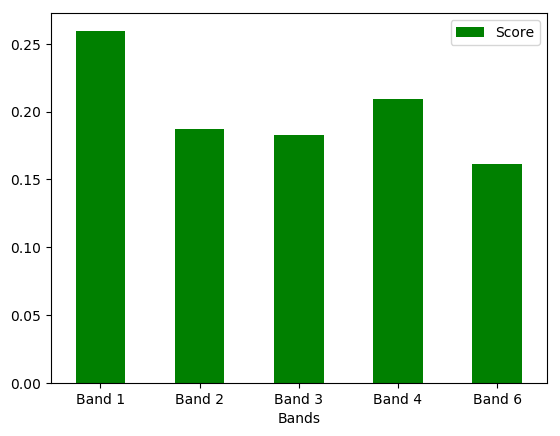

In [13]:
df.plot.bar(x='Bands', y='Score', rot=0,  color=('g'))
plt.show()